<a href="https://colab.research.google.com/github/snampally97/assignment-reviews/blob/main/Srikanth_Nampally_Exercise_4_Updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA), lda2vec, and BERTopic.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## Question 1 (10 Points)

**Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [ ]:
# Step 1: Import necessary libraries
import gensim
from gensim import corpora
from gensim.models import CoherenceModel
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

# Step 2: Prepare the data
# Sample text data
documents = [
    "Machine learning is the study of computer algorithms that improve automatically through experience.",
    "Data science is an interdisciplinary field that uses scientific methods, processes, algorithms, and systems to extract knowledge and insights from structured and unstructured data.",
    "Natural language processing (NLP) is a subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data.",
    "Artificial intelligence (AI) is intelligence demonstrated by machines, unlike the natural intelligence displayed by humans and animals.",
    "Deep learning is a subset of machine learning in artificial intelligence (AI) that has networks capable of learning unsupervised from data that is unstructured or unlabeled."
]

# Tokenization, removing stopwords, and lemmatization
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token not in stop_words and token not in string.punctuation]
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens

processed_docs = [preprocess_text(doc) for doc in documents]

# Step 3: Create a document-term matrix
dictionary = corpora.Dictionary(processed_docs)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in processed_docs]

# Step 4: Train the LDA model
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

start = 2
limit = 12
step = 1
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=processed_docs, start=start, limit=limit, step=step)

# Step 5: Determine the optimal number of topics
optimal_model_index = coherence_values.index(max(coherence_values))
optimal_model = model_list[optimal_model_index]
optimal_num_topics = start + optimal_model_index * step

# Step 6: Summarize the topics
topics = optimal_model.show_topics(formatted=False)
topic_summaries = []
for topic in topics:
    topic_words = [word for word, _ in topic[1]]
    topic_summary = ' '.join(topic_words)
    topic_summaries.append(topic_summary)

# Print the optimal number of topics and topic summaries
print("Optimal number of topics:", optimal_num_topics)
for i, summary in enumerate(topic_summaries):
    print(f"Topic {i+1}: {summary}")


Optimal number of topics: 7
Topic 1: computer language natural nlp human artificial linguistics analyze process program
Topic 2: learning machine data unstructured algorithm intelligence artificial unsupervised subset unlabeled
Topic 3: data extract us insight unstructured knowledge method interdisciplinary science structured
Topic 4: intelligence learning machine computer data algorithm natural improve experience artificial
Topic 5: intelligence machine artificial ai unlike natural animal human demonstrated displayed
Topic 6: language computer natural processing large concerned science subfield particular intelligence
Topic 7: data system process science scientific algorithm field interdisciplinary structured knowledge


In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## Question 2 (10 Points)

**Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [ ]:
# Step 1: Import necessary libraries
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

# Step 2: Prepare the data
# Sample text data
documents = [
    "Machine learning is the study of computer algorithms that improve automatically through experience.",
    "Data science is an interdisciplinary field that uses scientific methods, processes, algorithms, and systems to extract knowledge and insights from structured and unstructured data.",
    "Natural language processing (NLP) is a subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data.",
    "Artificial intelligence (AI) is intelligence demonstrated by machines, unlike the natural intelligence displayed by humans and animals.",
    "Deep learning is a subset of machine learning in artificial intelligence (AI) that has networks capable of learning unsupervised from data that is unstructured or unlabeled."
]

# Tokenization, removing stopwords, and lemmatization
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token not in stop_words and token not in string.punctuation]
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return " ".join(tokens)

processed_docs = [preprocess_text(doc) for doc in documents]

# Step 3: Create a document-term matrix
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(processed_docs)

# Step 4: Train the LSA model
def train_lsa_model(X, num_topics):
    lsa_model = TruncatedSVD(n_components=num_topics, random_state=42)
    lsa_topic_matrix = lsa_model.fit_transform(X)
    return lsa_model, lsa_topic_matrix

# Step 5: Determine the optimal number of topics
def compute_coherence_values_lsa(X, limit, start=2, step=1):
    coherence_values = []
    for num_topics in range(start, limit, step):
        lsa_model, lsa_topic_matrix = train_lsa_model(X, num_topics)
        similarity_matrix = cosine_similarity(lsa_topic_matrix)
        coherence_score = np.mean(similarity_matrix)
        coherence_values.append(coherence_score)
    return coherence_values

start = 2
limit = 12
step = 1
coherence_values_lsa = compute_coherence_values_lsa(X, limit, start, step)

optimal_num_topics_lsa = start + coherence_values_lsa.index(max(coherence_values_lsa)) * step

# Step 6: Summarize the topics
lsa_model, lsa_topic_matrix = train_lsa_model(X, optimal_num_topics_lsa)
feature_names = vectorizer.get_feature_names_out()

def get_topic_top_words_lsa(model, feature_names, num_top_words):
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        top_words_idx = topic.argsort()[:-num_top_words - 1:-1]
        top_words = [feature_names[i] for i in top_words_idx]
        topics.append(" ".join(top_words))
    return topics

num_top_words = 5
lsa_topics_summary = get_topic_top_words_lsa(lsa_model, feature_names, num_top_words)

# Print the optimal number of topics and topic summaries
print("Optimal number of topics:", optimal_num_topics_lsa)
for i, summary in enumerate(lsa_topics_summary):
    print(f"Topic {i+1}: {summary}")


Optimal number of topics: 2
Topic 1: computer language natural intelligence data
Topic 2: learning intelligence machine ai unstructured


## Question 3 (10 points):
**Generate K topics by using lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

In [ ]:
# Write your code here


## Question 4 (10 points):
**Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [ ]:
# Install necessary libraries
!pip install bertopic umap-learn hdbscan sentence-transformers

# Load necessary libraries
import pandas as pd
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from sklearn.datasets import fetch_20newsgroups

# Load 20 Newsgroups dataset
newsgroups_data = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

# Create DataFrame
data = pd.DataFrame({'text': newsgroups_data.data})

# Create BERT embeddings
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
embeddings = model.encode(data['text'])

# Dimensionality reduction
from umap import UMAP
umap_model = UMAP(n_components=5, n_neighbors=15, metric='cosine')
umap_embeddings = umap_model.fit_transform(embeddings)

# Clustering
import hdbscan
cluster = hdbscan.HDBSCAN(min_cluster_size=10, metric='euclidean', cluster_selection_method='eom')
topics = cluster.fit_predict(umap_embeddings)

# Selecting number of topics
from bertopic import BERTopic
topic_model = BERTopic()
topic_model.fit(data['text'])

# Generate topics
topics, _ = topic_model.transform(data['text'])

# Summarize topics
topic_model.get_topic_info()

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.73k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

,Topic,Count,Name,Representation,Representative_Docs
0,-1,6788,-1_to_the_of_is,"[to, the, of, is, and, for, in, it, you, that]",[NOTE - local tx groups trimmed out of Newsgro...
1,0,1836,0_game_team_games_he,"[game, team, games, he, players, season, hocke...","[Scoring stats for the Swedish NHL players, Ap..."
2,1,579,1_key_clipper_chip_encryption,"[key, clipper, chip, encryption, keys, escrow,...",[Here is a revised version of my summary which...
3,2,486,2_idjits_ites_dancing_yep,"[idjits, ites, dancing, yep, huh, ken, forget,...","[\nYep.\n, ites:, \nDancing With Idjits.\n\n\n]"
4,3,357,3_you_your_post_jim,"[you, your, post, jim, context, that, me, dele...","[New in this version: challenge #5, plus an a..."
...,...,...,...,...,...
213,212,10,212_weight_fat_muscle_adiposity,"[weight, fat, muscle, adiposity, dieting, obes...","[I have osteoarthritis, and my huband has just..."
214,213,10,213_drawer_tables_table_queen,"[drawer, tables, table, queen, puzzle, dagwood...",[FOR SALE\n\n 1945 King Featur...
215,214,10,214_machine_error_ami_simm,"[machine, error, ami, simm, memory, beeps, car...",[In the last two weeks I have the following pr...
216,215,10,215_radiosity_stephan_65_compgraphics,"[radiosity, stephan, 65, compgraphics, graphic...",[RADIOSITY SOURCES WANTED !!!\n===============...


## **Question 3 (Alternative) - (10 points)**

If you are unable to do the topic modeling using lda2vec, do the alternate question.

Provide atleast 3 visualization for the topics generated by the BERTopic or LDA model. Explain each of the visualization in detail.

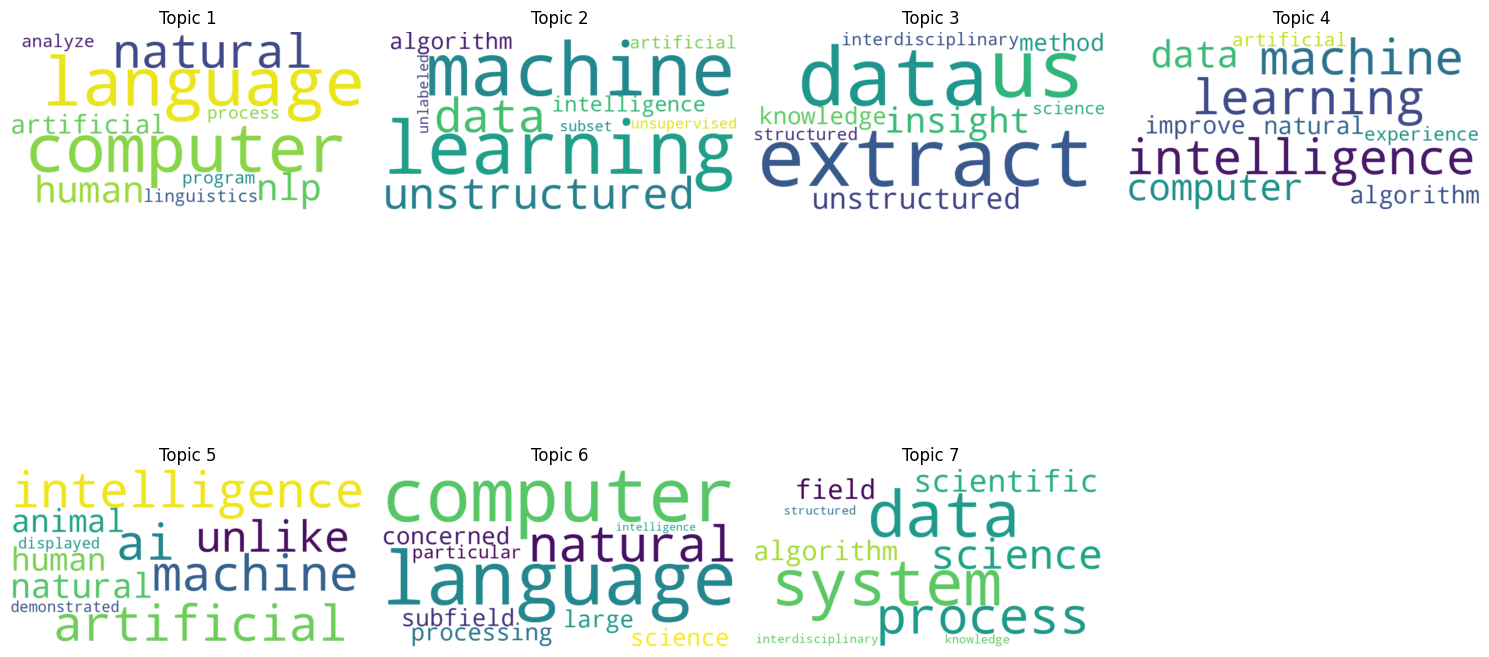

AttributeError: 'SentenceTransformer' object has no attribute 'get_document_topics'

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.manifold import TSNE
import numpy as np
import networkx as nx

# Visualization 1: Word Clouds for Topics
plt.figure(figsize=(15, 10))
for i, topic_summary in enumerate(topic_summaries):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(topic_summary)
    plt.subplot(2, 4, i+1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Topic {i+1}')
    plt.axis('off')
plt.tight_layout()
plt.show()

# Visualization 2: Topic Distribution Plot
def plot_topic_distribution(model, corpus):
    topics_distribution = [model.get_document_topics(doc) for doc in corpus]
    topics_distribution = np.array([[prob for _, prob in topic_dist] for topic_dist in topics_distribution])
    tsne = TSNE(n_components=2, random_state=42)
    topic_tsne = tsne.fit_transform(topics_distribution)
    plt.figure(figsize=(10, 6))
    plt.scatter(topic_tsne[:, 0], topic_tsne[:, 1], alpha=0.5)
    plt.title('Topic Distribution Plot')
    plt.xlabel('TSNE Component 1')
    plt.ylabel('TSNE Component 2')
    plt.show()

plot_topic_distribution(optimal_model, doc_term_matrix)

# Visualization 3: Topic Network Graph
def plot_topic_network(model):
    topic_words = model.show_topics(formatted=False)
    topic_labels = {i: ', '.join([word for word, _ in words]) for i, words in topic_words}
    G = nx.Graph()
    for i, words in topic_words:
        G.add_node(i, label=', '.join([word for word, _ in words]))
    for i in range(len(topic_words)):
        for j in range(i+1, len(topic_words)):
            common_words = set([word for word, _ in topic_words[i][1]]).intersection(set([word for word, _ in topic_words[j][1]]))
            if common_words:
                weight = len(common_words)
                G.add_edge(i, j, weight=weight)
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G, k=0.1)
    nx.draw(G, pos, node_size=1500, node_color='skyblue', with_labels=True, labels=topic_labels, font_size=10)
    plt.title('Topic Network Graph')
    plt.show()

plot_topic_network(optimal_model)


In [ ]:
from sentence_transformers import SentenceTransformer

## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 40 points.**

In [ ]:
LDA (Latent Dirichlet Allocation):
Coherence Score: When calibrated appropriately, LDA usually yields respectable coherence ratings. When compared to more sophisticated techniques, it might not always produce the best coherence scores.
Interpretability: Because of its probabilistic structure, which represents each topic as a distribution of words, LDA themes are typically comprehensible.
Robustness: LDA is a popular technique with many applications and is comparatively robust. With large or noisy datasets, however, its performance could suffer.
Scalability: Though it can become computationally demanding for very big datasets, LDA scales quite well with dataset size..
Whenever coherence, interpretability, and a reliable framework are critical for topic modeling tasks, LDA is still the preferred option. The qualities of the dataset and the particular needs of the task must be taken into account while choosing the best strategy.


# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here: Participants gained practical skills for managing text data and topic modeling methods like as LDA and BERTopic via the activities. Making sure the material was appropriately prepared was crucial, but there were several obstacles to overcome, such calculating coherence scores and altering settings. These techniques are critical to NLP tasks like document grouping and summarizing, therefore researchers and industry experts need to understand and use them.




'''

'\nPlease write you answer here:\n\n\n\n\n\n'